In [19]:
import numpy as np
#Pylab is a package that provides a set of utilities and interfaces to process laboratory data
import pylab as plt
#Networkx a package to support creating network graphs
import networkx as nx

#To install them run
#pip install numpy
#pip install pylab
#pip install networkx

In [10]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1),(1,0),(4,1),(4,5),(3,1),(3,2),(3,5),(2,3),(1,3),(1,4),(5,3),(5,4),(5,5)]

#setting the goal
goal = 5

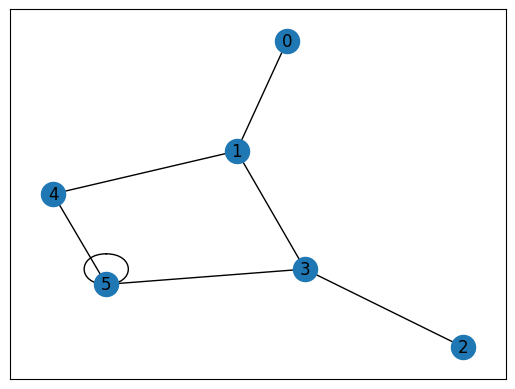

In [11]:
# generate the network from the points list
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [12]:
#1. Set the gamma parameter, and environment rewards in matrix R.
# set the learning rate (gamma)
gamma = 0.8

#initialize the reward matrix X
MATRIX_SIZE = 6
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#change the values to be 0 if it is a viable path and 100 if it is a goal path
for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.  -1. 100.]
 [ -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.  -1.   0.   0. 100.]]


In [17]:
# 2. Initialize matrix Q to zero.
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [14]:
#creating some helper functions

# available_actions returns the possible movements from a given point
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# sample_next_action chooses randomly the next move based on the list of possible moves
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

#update updates the current state with the next move, updating the Q-learning matrix in the process
# Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

Trained Q matrix:
[[  0.          63.97562927   0.           0.           0.
    0.        ]
 [ 51.18050341   0.           0.          79.96953658  79.95393033
    0.        ]
 [  0.           0.           0.          79.96953658   0.
    0.        ]
 [  0.          63.97562927  63.9036454    0.           0.
   99.96192073]
 [  0.          63.947538     0.           0.           0.
  100.        ]
 [  0.           0.           0.          79.96953658  79.95393033
  100.        ]]


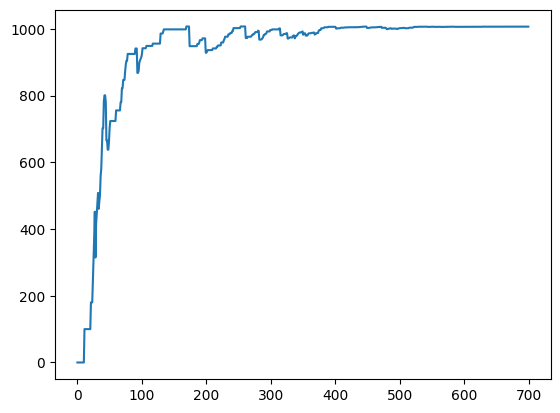

In [15]:
episodes = 700
scores = []
for i in range(episodes):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)


print("Trained Q matrix:")
#Lets normalize Q (i.e.; converte into percentage) by dividing all non-zero entries by the highest number
print(Q/np.max(Q)*100)

#check the learning progress
plt.plot(scores)
plt.show()

In [16]:
initial_state =2
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[2, 3, 5]
